# Numerical tests

In [49]:
using Pkg
Pkg.activate(".")
# First time only:
# Pkg.instantiate()
using DifferentialEquations, Plots, Printf

  Activating environment at `C:\Users\fitzgeraldt\Documents\ensc481-2021-examples\class-demos\04-06\Project.toml`


In [24]:
function sysode!(dz,z,params,t) 
    M, m, g, k, k_t, c, a, l_G, l_T, l_f, θ_0, x_0, f = params
    
    p_1,p_2 = z[1:2]
    x,θ = z[3:4]
    
    # copied from the derivation sheet
    pdot = [g*m + k*(x_0 - x), -a^2*c*(-12*l_T*p_1*cos(θ) - 12*p_2)*cos(θ)^2/(-12*M*l_G^2 - M*l_T^2 + 12*l_T^2*m*cos(θ)^2 - 12*l_T^2*m) + l_f*f(t)*cos(θ) + (24*l_T^2*(12*M*m*(12*l_G^2 + l_T^2)*(l_T*p_1*cos(θ) + p_2)^2 + 144*l_T^2*m^2*(l_T*p_1*cos(θ) + p_2)^2 - 24*l_T*m*(l_T*p_1*cos(θ) + p_2)*(12*M*l_G^2*p_1 + M*l_T^2*p_1 + 12*l_T^2*m*p_1 + 12*l_T*m*p_2*cos(θ))*cos(θ) + m*(12*M*l_G^2 + M*l_T^2 + 12*l_T^2*m*sin(θ)^2)^2*(2*M*g*l_G*sin(θ) + 2*g*m*(l_T*sin(θ) - x) + k*(x_0 - x)^2 + k_t*(θ_0 - θ)^2) + (12*M*l_G^2*p_1 + M*l_T^2*p_1 + 12*l_T^2*m*p_1 + 12*l_T*m*p_2*cos(θ))^2)*sin(θ)*cos(θ) + (12*M*l_G^2 + M*l_T^2 + 12*l_T^2*m*sin(θ)^2)*(12*M*l_T*p_1*(12*l_G^2 + l_T^2)*(l_T*p_1*cos(θ) + p_2)*sin(θ) + 144*l_T^3*m*p_1*(l_T*p_1*cos(θ) + p_2)*sin(θ) - 144*l_T^2*m*p_2*(l_T*p_1*cos(θ) + p_2)*sin(θ)*cos(θ) - 24*l_T^2*m*(12*M*l_G^2 + M*l_T^2 + 12*l_T^2*m*sin(θ)^2)*(2*M*g*l_G*sin(θ) + 2*g*m*(l_T*sin(θ) - x) + k*(x_0 - x)^2 + k_t*(θ_0 - θ)^2)*sin(θ)*cos(θ) - 12*l_T^2*p_1*(12*M*l_G^2*p_1 + M*l_T^2*p_1 + 12*l_T^2*m*p_1 + 12*l_T*m*p_2*cos(θ))*sin(θ)*cos(θ) + 12*l_T*p_2*(12*M*l_G^2*p_1 + M*l_T^2*p_1 + 12*l_T^2*m*p_1 + 12*l_T*m*p_2*cos(θ))*sin(θ) - 12*l_T*(l_T*p_1*cos(θ) + p_2)*(12*M*l_G^2*p_1 + M*l_T^2*p_1 + 12*l_T^2*m*p_1 + 12*l_T*m*p_2*cos(θ))*sin(θ) - (12*M*l_G^2 + M*l_T^2 + 12*l_T^2*m*sin(θ)^2)^2*(M*g*l_G*cos(θ) + g*l_T*m*cos(θ) - k_t*(θ_0 - θ))))/(12*M*l_G^2 + M*l_T^2 + 12*l_T^2*m*sin(θ)^2)^3]
    qdot = [(24*M*l_T*m*(12*l_G^2 + l_T^2)*(l_T*p_1*cos(θ) + p_2)*cos(θ) + 288*l_T^3*m^2*(l_T*p_1*cos(θ) + p_2)*cos(θ) - 24*l_T^2*m*(12*M*l_G^2*p_1 + M*l_T^2*p_1 + 12*l_T^2*m*p_1 + 12*l_T*m*p_2*cos(θ))*cos(θ)^2 - 24*l_T*m*(l_T*p_1*cos(θ) + p_2)*(12*M*l_G^2 + M*l_T^2 + 12*l_T^2*m)*cos(θ) + (24*M*l_G^2 + 2*M*l_T^2 + 24*l_T^2*m)*(12*M*l_G^2*p_1 + M*l_T^2*p_1 + 12*l_T^2*m*p_1 + 12*l_T*m*p_2*cos(θ)))/(2*m*(12*M*l_G^2 + M*l_T^2 + 12*l_T^2*m*sin(θ)^2)^2), (12*M*m*(12*l_G^2 + l_T^2)*(2*l_T*p_1*cos(θ) + 2*p_2) - 288*l_T^2*m^2*(l_T*p_1*cos(θ) + p_2)*cos(θ)^2 + 144*l_T^2*m^2*(2*l_T*p_1*cos(θ) + 2*p_2))/(2*m*(12*M*l_G^2 + M*l_T^2 + 12*l_T^2*m*sin(θ)^2)^2)]
    dz[1:4] .= vcat(pdot, qdot)
end

sysode! (generic function with 1 method)

In [62]:
M    = 2.      # [kg]
m    = 0.5     #[kg]
g    = 9.81    #[m/s^2]
k    = 30      #[N/m]
k_t  = 50      #[Nm/rad]
c    = 0.2     #[Ns/m]
l_T  = 1.0     #[m]
a    = 0.2*l_T #[m]
l_G  = l_T/2   #[m]
l_f  = 0.8*l_T #[m]
x_eq = 0.3     #[m]
θ_0  = (M*g*l_G + g*l_T*m)/k_t #[rad]
x_0  = (-g*m + k*x_eq)/k #[m]
f(t) = 0. #[N]
params = (M, m, g, k, k_t, c, a, l_G, l_T, l_f, θ_0, x_0, f)

# Integration time
tspan = (0,10.)

# Initial conditions (p1,p2,x,theta)
z0 = [ 0., 0., 0.2, 0.1]

# Define the problem
prob = ODEProblem(sysode!, z0, tspan, params)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 10.0)
u0: 4-element Vector{Float64}:
  0.0
  0.0
  0.2
 -0.1

Now let's solve the system

In [63]:
sol = solve(prob);

## Animation

First, let's define the various functions to go from the states $z$ to the positions of the bar and the mass

In [64]:
T = LinRange(0,tspan[2], 200)

x(t) = sol(t)[3]
θ(t) = sol(t)[4]

rB(t) = [l_T*cos(θ(t)), l_T*sin(θ(t))]
rm(t) = rB(t) + [0, - x(t)]

Ox(t) = 0.
Oy(t) = 0.

Bx(t) = rB(t)[1]
By(t) = rB(t)[2]

mx(t) = rm(t)[1]
my(t) = rm(t)[2]
;

┌ Info: Saved animation to 
│   fn = C:\Users\fitzgeraldt\Documents\ensc481-2021-examples\class-demos\04-06\temp.gif
└ @ Plots C:\Users\fitzgeraldt\.julia\packages\Plots\SVksJ\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\fitzgeraldt\\Documents\\ensc481-2021-examples\\class-demos\\04-06\\temp.gif")
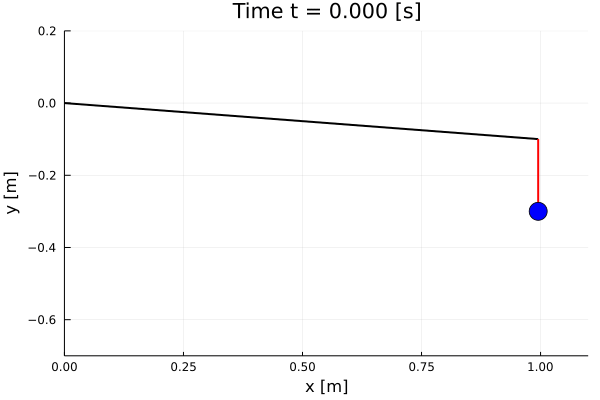

In [68]:
anim = @animate for t in T

        # plot the pendulum bars
        plot( [Ox(t), Bx(t) ], [ Oy(t), By(t) ],
            linewidth = 2,
            linecolor = "black",
            label="",
            xlabel="x [m]", ylabel="y [m]",
            xlim=(0, l_T*1.1),
            ylim=(-0.7,0.2),
            title=@sprintf("Time t = %.3f [s]", t)
            )
    
        # Plot the spring to the mass
        plot!( [Bx(t), mx(t) ], [ By(t), my(t) ],
            linewidth = 2,
            linecolor = "red",
            label="", )
    
        # Plot the mass
        scatter!( [mx(t)], [my(t)], 
            markercolor= "blue",
            markersize = 10,
            markerstrokewidth = 1,
            label=""  )
end
gif(anim, "temp.gif", fps=20)